In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## %matplotlib inline
definition: python 有一组预先定义好的所谓magic functions,你可以通过命令行的语法形式来访问它们。
 
所以%matplotlib inline 可以在python编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。

用在Jupyter notebook（不能在pycharm中使用）中具体作用是当你调用matplotlibpyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。


## warnings.filterwarnings("ignore")
警告过滤器用于控制警告消息的行为，如忽略，显示或转换为错误（引发异常）。警告过滤器维护着一个有序的过滤规则列表，匹配规则用于确定如何处理警告，任何特定警告都将依次与列表中的每个过滤规则匹配，直到找到匹配为止。

import warnings，warnings.filterwarnings('ignore')。这两行代码可以用在，解决在 Python 数据分析时， 不管是调用模型还是调整参数，都充满了满篇红色，有些可忽略，有些不可忽略。


In [2]:
# 读入数据
df = pd.read_csv("temps.csv")
df.head()


,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [6]:
print("dimensions of dataset:",df.shape)

dimensions of dataset: (348, 9)


## Introduction
- temp_2 :前天的最高温度
- temp_2 :昨天的最高温度
- average ：历史中，每年这一天的平均最高温度
- actual：当天的最高温度，也就是label
- friend：哈哈，凑热闹？

In [7]:
# 时间类型的转换
import datetime
years = df["year"]
months = df["month"]
days = df["day"]

# datetime format
#必须把str转换为datetime。转换方法是通过datetime.strptime()实现
#datetime.datetime.strptime:万能的日期格式转换
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) \
    for year, month, day in zip(years, months, days)]

dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [10]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

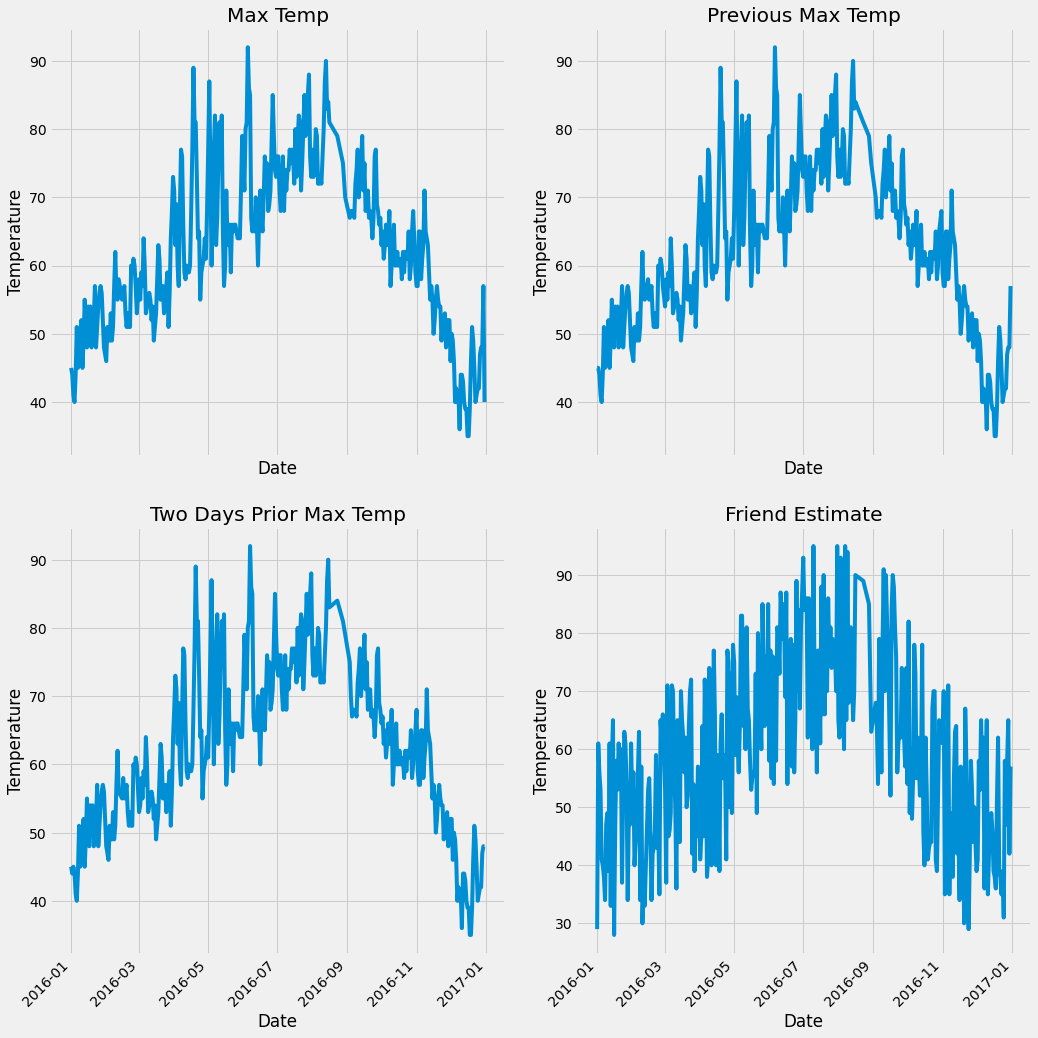

In [13]:
# show with matplotlib
plt.style.use('fivethirtyeight')
##准备画图,
# ##指定默认风格

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
# 设置布局
 
fig.autofmt_xdate(rotation = 45)# X轴上旋转45度并且右对齐,nice!
 
 
ax1.plot(dates, df['actual'])
ax1.set_xlabel('Date'); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')# 
 
 
ax2.plot(dates, df['temp_1'])# 昨天
ax2.set_xlabel('Date'); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')
 
 
ax3.plot(dates, df['temp_2'])# 前天
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')
 
 
ax4.plot(dates, df['friend'])# friend
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')#tight_layout会自动调整子图参数,使之填充整个图像区域
 
plt.tight_layout(pad=2)
#会自动调整子图参数，使之填充整个图像区域。这是个实验特性，
# 可能在一些情况下不工作。它仅仅检查坐标轴标签、刻度标签以及标题的部分。

In [14]:
# the problem of image style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [17]:
## one-hot encode
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [26]:
# labels
labels = np.array(df["actual"])

# delete the lables from the features
# drop function ：delete rows by default
features = df.drop("actual",axis=1)

features.head()

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,41,0,0,0,0,0,1,0


In [22]:
# normalization
# sklearn.prepocessing package povid some common utility functions and converter classes
from sklearn import preprocessing
# fit_transform is the combination of fit and transform
input_features = preprocessing.StandardScaler().fit_transform(features)

# show
input_features[0]

# After processing, the data fluctuated less and converged faster.

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

In [28]:
input_features.shape
# row vectors

(348, 14)

In [31]:
# Building a nn

# featurs and labels
x = torch.tensor(input_features,dtype=float)
y = torch.tensor(labels,dtype=float)

# initialize the weight
# randn(4*128)表示将输入的14个特征转化为128个隐层的特征。
weights = torch.randn((14, 128), dtype = float, requires_grad = True)
biases = torch.randn(128, dtype = float, requires_grad = True)
weights2 = torch.randn((128, 1), dtype = float, requires_grad = True)
biases2 = torch.randn(1, dtype = float, requires_grad = True)

# super parameter
learning_rate = 0.001
losses = []

# iterate 1000 times
for i in range(1000):
    # 计算隐层;x.mm（weights） x与weights相乘
    hidden = x.mm(weights) + biases
    # 加入激活函数
    hidden = torch.relu(hidden)
    # 预测结果,第二层
    predictions = hidden.mm(weights2) + biases2
    # 计算损失
    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())
    
    # 打印损失值
    if i % 100 == 0:
        print('loss:', loss)
    # 反向传播
    loss.backward()
    
    #更新参数,-号表示反方向
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases2.data.add_(- learning_rate * biases2.grad.data)
    
    # 每次迭代都得记得清空
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()

loss: tensor(4590.1203, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(154.5476, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(146.4327, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(144.0665, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(142.8360, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(142.0440, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.5004, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.1147, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.8346, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.6141, dtype=torch.float64, grad_fn=<MeanBackward0>)


给我们了一个提醒，建一个神经网络是简单的，但是如何优化确实一个难题

In [33]:
# more simple a nnm---it's more important for us to learn
# 一般我们将一个sample设为行向量
input_size = input_features.shape[1]
hidden_size = 128
output_size = 1
batch_size = 16

#通过Squential将网络层和激活函数结合起来，输出激活后的网络节点
my_nn = torch.nn.Sequential(
    #指定好输入输出
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(), 
    torch.nn.Linear(hidden_size, output_size),
)
#计算损失函数
cost = torch.nn.MSELoss(reduction='mean')
#优化器， 用做好的，会动态调整
optimizer = torch.optim.Adam(my_nn.parameters(), lr = 0.001)
# Adam可以动态的调节学习率，从大到小，随着迭代次数衰减

In [34]:
#训练网络
# introduce the concept of batch
losses = []
for i in range(1000):
    batch_loss = []
    #MINI-Batch方法来进行训练
    for start in range(0, len(input_features), batch_size):
        end = start + batch_size if start + batch_size < len(input_features) else len(input_features)
        #取了部分数据
        xx = torch.tensor(input_features[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(labels[start:end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        
        #优化，梯度清零，反响传播,更新参数
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())
        
    # 打印损失
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 3958.6501
100 37.5989
200 35.634182
300 35.30098
400 35.141056
500 35.014725
600 34.902
700 34.79135
800 34.678383
900 34.560726


总的来说进行一次backward之后，各个节点的值会清除，这样进行第二次backward会报错，如果加上retain_graph==True后,可以再来一次backward。
 retain_graph (bool, optional) – If False, the graph used to compute the grad will be freed. Note that in nearly all cases setting this option to True is not needed and often can be worked around in a much more efficient way. Defaults to the value of create_graph.

大意是如果设置为False，计算图中的中间变量在计算完后就会被释放。但是在平时的使用中这个参数默认都为False从而提高效率，和creat_graph的值一样。

In [40]:
# trained results
x = torch.tensor(input_features, dtype = torch.float)
predict = my_nn(x).data.numpy()
predict.shape

(348, 1)

In [43]:
predict.reshape(-1).shape

(348,)

In [45]:
labels.shape

(348,)

In [38]:
# transform the format in order to draw
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
 
# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
true_data.head

<bound method NDFrame.head of           date  actual
0   2016-01-01      45
1   2016-01-02      44
2   2016-01-03      41
3   2016-01-04      40
4   2016-01-05      44
..         ...     ...
343 2016-12-27      47
344 2016-12-28      48
345 2016-12-29      48
346 2016-12-30      57
347 2016-12-31      40

[348 rows x 2 columns]>

In [46]:
# 同理，再创建一个来存日期和其对应的模型预测值

 
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
 
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
 
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)}) 
# 居然必须要转化成那种没有dimension的一列的格式

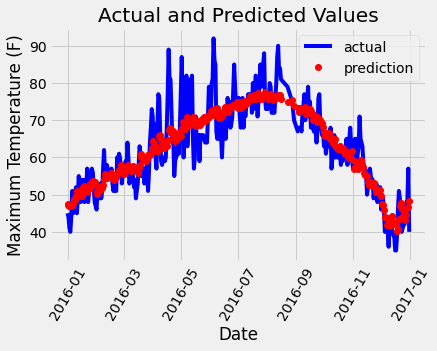

In [47]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
 
# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
 
# 图名
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');